In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('drive/My Drive/5_a.csv')

In [ ]:
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [ ]:
df['proba'] = np.where(df['proba'] > 0.5, 1, df['proba'])
df['proba']=np.where(df['proba'] < 0.5,0,df['proba'])
print(df['proba'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10095    1.0
10096    1.0
10097    1.0
10098    1.0
10099    1.0
Name: proba, Length: 10100, dtype: float64


In [ ]:
'''
tpr_array=[]
fpr_array=[]
sort= df.sort_values("proba",ascending=False) # sort sart based on probability scores
for i in range(0,len(sort)):
    sort['y_pred']=np.where(sort['proba']>=sort.iloc[i]['proba'],1,0) # predicting the y based on each threshold
    TP,FP,TN,FN=perf_metr(df['y'],df['proba'])    # for each threshold calculating confusion matrix
    fpr_rate=FP/(TN+FP)
    tpr_rate=TP/(TP+FN)
    tpr_array.append(tpr_rate)
    fpr_array.append(fpr_rate)
c=np.trapz(tpr_array, fpr_array)'''

'\ntpr_array=[]\nfpr_array=[]\nsort= df.sort_values("proba",ascending=False) # sort sart based on probability scores\nfor i in range(0,len(sort)):\n    sort[\'y_pred\']=np.where(sort[\'proba\']>=sort.iloc[i][\'proba\'],1,0) # predicting the y based on each threshold\n    TP,FP,TN,FN=perf_metr(df[\'y\'],df[\'proba\'])    # for each threshold calculating confusion matrix\n    fpr_rate=FP/(TN+FP)\n    tpr_rate=TP/(TP+FN)\n    tpr_array.append(tpr_rate)\n    fpr_array.append(fpr_rate)\nc=np.trapz(tpr_array, fpr_array)'

Confusion matrix

In [ ]:
conf_mat=pd.crosstab(df['y'],df['proba'])
#https://moonbooks.org/Articles/How-to-create-and-plot-a-contingency-table-or-crosstab-from-two-dataframe-columns-using-pandas-in-python-/

In [ ]:
print(conf_mat)

proba    1.0
y           
0.0      100
1.0    10000


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(df['y'],df['proba'])

array([[    0,   100],
       [    0, 10000]])

In [ ]:
def perf_metr(actual,pred):
  TP=0
  FP=0
  TN=0
  FN=0
  for i in range(len(pred)):
    if actual[i]==pred[i]==1:
      TP+=1
    if actual[i]!=pred[i] and pred[i]==1:
      FP+=1
    if actual[i]==pred[i]==0:
      TN+=1
    if actual[i]!=pred[i] and pred[i]==0:
      FN+=1
  return TP,FP,TN,FN      

In [ ]:
basic_metr=list(perf_metr(df['y'],df['proba']))
basic_metr

[10000, 100, 0, 0]

In [ ]:
precision=basic_metr[0]/(basic_metr[0]+basic_metr[1])
recall=basic_metr[0]/(basic_metr[0]+basic_metr[3])
print(precision,recall)

0.9900990099009901 1.0


F1-Score

In [ ]:
f1_score=(2*precision*recall)/(precision+recall)
f1_score

0.9950248756218906

Accuracy score

In [ ]:
accuracy_score=(basic_metr[0]+basic_metr[2])/(basic_metr[0]+basic_metr[1]+basic_metr[2]+basic_metr[3])
accuracy_score

0.9900990099009901

In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

roc-auc curve

In [ ]:
def roc_curve(probabilities,y_test,partitions=100):
  roc =np.array([])
  for i in range(partitions+1):

    threshold_vector=np.greater(probabilities,i/partitions).astype(int)
    tpr,fpr= true_false_positive(threshold_vector,y_test)
    roc=np.append(roc,[fpr,tpr])

  return roc.reshape(-1,2)

In [ ]:
df=pd.read_csv('drive/My Drive/5_a.csv')
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [ ]:
roc_curve(df['proba'],df['y'])


array([[1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],
       [1.    , 1.    ],


AUC Score

In [ ]:
from tqdm import tqdm
def get_single_tpr_fpr(df):

    '''
    Note, this implementation is only for binaly class labels (0 and 1)
    :param df: the dataframe should have 'y' and 'y_predicted' as its labels
    :return: a list containing tpr and fpr
    '''

    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


def calculate_all_thresholds_tpr_fpr_arr(df_original):

    '''

    :param df_original: the original dataframe, which should have a 'proba' label
    :return: two arrays, tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds
    '''

    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df = df_original.sort_values(by=['proba'], ascending=False)

    unique_probability_thresholds = sorted_df['proba'].unique()

    for threshold in tqdm(unique_probability_thresholds):
        sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds

all_tpr,all_fpr =calculate_all_thresholds_tpr_fpr_arr(df)

100%|██████████| 10100/10100 [00:22<00:00, 456.92it/s]


In [ ]:
auc_score_5_a = np.trapz(all_tpr,all_fpr)
print(auc_score_5_a)

0.48829900000000004


Text(0, 0.5, 'True Positive Rate')

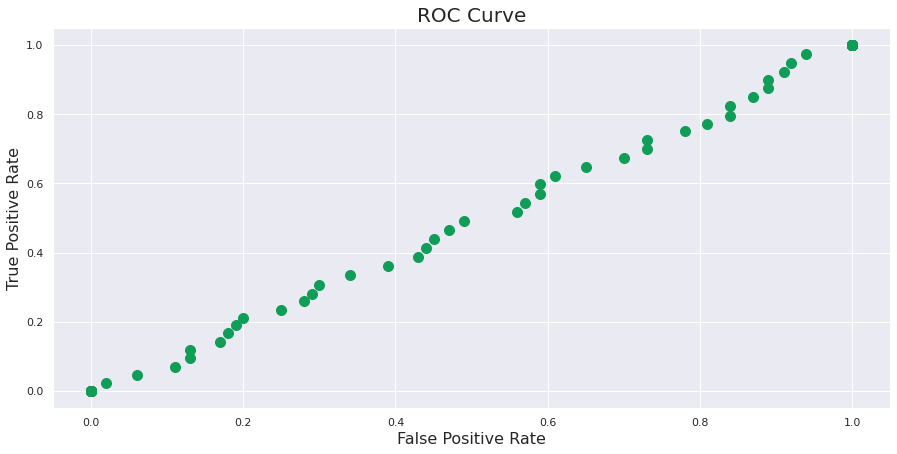

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(15,7))

ROC = roc_curve(df['proba'],df['y'],partitions=100)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

Part 2



In [ ]:
df2=pd.read_csv('drive/My Drive/5_b.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [ ]:
df2['proba'] = np.where(df2['proba'] < 0.5, 0, df2['proba'])
df2['proba'] = np.where(df2['proba'] >= 0.5, 1, df2['proba'])
df2.head()

,y,proba
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Confusion Matrix

In [ ]:
conf_mat2=pd.crosstab(df2['y'],df2['proba'])
conf_mat2

proba,0.0,1.0
y,,
0.0,9761,239
1.0,45,55


In [ ]:
confusion_matrix(df2['y'],df2['proba'])  #to verify with the actual sklearn library

array([[9761,  239],
       [  45,   55]])

In [ ]:
def perf_metr(actual,pred):
  TP=0
  FP=0
  TN=0
  FN=0
  for i in range(len(pred)):
    if actual[i]==pred[i]==1:
      TP+=1
    if actual[i]!=pred[i] and pred[i]==1:
      FP+=1
    if actual[i]==pred[i]==0:
      TN+=1
    if actual[i]!=pred[i] and pred[i]==0:
      FN+=1
  return TP,FP,TN,FN          

In [ ]:
basic_metr2=list(perf_metr(df2['y'],df2['proba']))
basic_metr2

[55, 239, 9761, 45]

In [ ]:
precision=basic_metr2[0]/(basic_metr2[0]+basic_metr2[1])
recall=basic_metr2[0]/(basic_metr2[0]+basic_metr2[3])
print(precision,recall)

0.1870748299319728 0.55


F1-score

In [ ]:
f1_score=(2*precision*recall)/(precision+recall)
f1_score

0.2791878172588833

Accuracy score

In [ ]:
accuracy_score=(basic_metr[0]+basic_metr[2])/(basic_metr[0]+basic_metr[1]+basic_metr[2]+basic_metr[3])
accuracy_score

0.9900990099009901

AUC Score

In [ ]:
all_tpr_5b,all_fpr_5b =calculate_all_thresholds_tpr_fpr_arr(df2)
auc_score_5b = np.trapz(all_tpr_5b,all_fpr_5b)
print("auc score is: ",auc_score_5b)

100%|██████████| 2/2 [00:00<00:00, 211.90it/s]

auc score is:  0.7564775


Text(0.5, 1.0, 'AUC=0.7565')

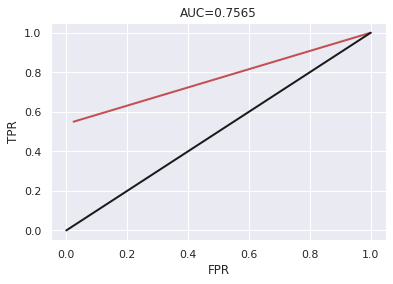

In [ ]:
'''import matplotlib.pyplot as plt 
import seaborn as sns
plt.plot(all_fpr_5b, all_tpr_5b, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5b, 4)))'''

C.Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data

In [ ]:
df_5c=pd.read_csv('drive/My Drive/5_c.csv')
df_5c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [ ]:
y_values=df_5c.iloc[:,0].values
prob_values=df_5c.iloc[:,1].values
print("actual y values",y_values)
print("predicted probability y values",prob_values)


uni_prob_thresholds= np.unique(df_5c['prob'])

actual y values [0 0 0 ... 1 1 1]
predicted probability y values [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [ ]:
def get_A_metric(y_actual,y_prob,threshold):
  tp=0
  fp=0
  tn=0
  fn=0
  min_a = float('inf')
  for i in range(len(y_prob)):
    if y_prob[i] >= threshold:
      if y_actual[i] ==1:
        tp += 1
      else:
        fn += 1

  A = (500 * fn) + (100 * fp)

  return A        

In [ ]:
def get_min_a(y_actual,y_pred,total_threshold):
  min_a = float('inf')
  min_t = 0

  for threshold in total_threshold:
    a = get_A_metric(y_actual,y_pred,threshold)
    if a <= min_a:
      min_a = min(a,min_a)
      min_t = threshold

  return min_a,min_t    

In [ ]:
print(get_min_a(y_values,prob_values,uni_prob_thresholds))

(0, 0.9577467989277196)


D. Compute performance metrics(for regression) for the given data 5_d.csv

Regression


In [ ]:
df=pd.read_csv('drive/My Drive/5_d.csv')
df.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [ ]:
print(df['y'])
print(df['pred'])

0         101.0
1         120.0
2         131.0
3         164.0
4         154.0
          ...  
157195     87.0
157196     97.0
157197    106.0
157198    105.0
157199     81.0
Name: y, Length: 157200, dtype: float64
0         100.0
1         100.0
2         113.0
3         125.0
4         152.0
          ...  
157195     83.0
157196     86.0
157197     93.0
157198    101.0
157199    104.0
Name: pred, Length: 157200, dtype: float64


In [ ]:
y_arr = df.iloc[:, 0].values
print('actual_y_train_arr_5d ',y_arr )
pred_arr = df.iloc[:, 1].values
print('predicted_y_arr_5d ', pred_arr)

actual_y_train_arr_5d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_arr_5d  [100. 100. 113. ...  93. 101. 104.]


In [ ]:
def calculate_r2_score(y_train,y_pred):
  y_train_bar=y_train.mean()

  sum_squared_residual= ((y_train - y_pred)**2).sum()
  sum_squared_total=((y_train - y_pred)**2).sum()

  return 1 - (sum_squared_residual/sum_squared_total)

print(calculate_r2_score(y_arr,pred_arr)) 

0.0


Mean squared error

In [ ]:
def calculate_mse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse
print(calculate_mse(y_arr,pred_arr))  

177.16569974554707


In [ ]:
def calculate_mape(y_actual,y_pred):
  mape= np.mean((np.abs(y_actual - y_pred)) / np.mean(y_actual)) *100
  return mape

print(calculate_mape(y_arr,pred_arr))  

12.912029940096867


In [ ]:
def calculate_mape2(y_actual,y_pred):
  mape= ((np.sum(np.abs(y_actual  - y_pred)))  /  np.sum(y_actual)) *100

  return mape

print(calculate_mape2(y_arr,pred_arr))  

12.91202994009687
